In [1]:
import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets,transforms
import torch.nn.functional as F
from torch import nn,optim

In [2]:
#Generate Transform to Imgaes
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,)),])

In [3]:
#Load the train data and test data
trainset=datasets.FashionMNIST('~/.pytorch/FashionMNIST_data/',train=True,download=True,transform=transform)
testset=datasets.FashionMNIST('~/.pytorch/FashionMNIST_data/',train=False,download=True,transform=transform)

0it [00:00, ?it/s]

26427392it [00:01, 14613990.41it/s]                             


Extracting /tmp/.pytorch/FashionMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 82287.84it/s]            
0it [00:00, ?it/s]

Extracting /tmp/.pytorch/FashionMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 3825426.32it/s]                             
0it [00:00, ?it/s]

Extracting /tmp/.pytorch/FashionMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 31818.20it/s]            

Extracting /tmp/.pytorch/FashionMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [4]:
#Make a Data Loader for every trainset and testset
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [5]:
#Take batch of images and labels
images,labels=next(iter(trainloader))

In [6]:
#Imgaes shapes
print(images.shape)

torch.Size([64, 1, 28, 28])


In [7]:
#Encode the 10's labels of images
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

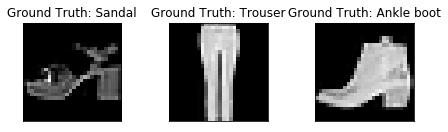

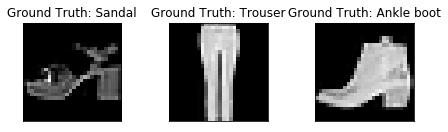

In [8]:
#Visualize and Explore data

fig = plt.figure()
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(clothing[int(labels[i])]))
  plt.xticks([])
  plt.yticks([])
fig


In [9]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        #Creat 4 Hidden Layers
        self.fc1=nn.Linear(784,256)
        self.fc2=nn.Linear(256,128)
        self.fc3=nn.Linear(128,64)
        self.fc4=nn.Linear(64,10)
        
        #Dropout Layers
        self.dropout=nn.Dropout(p=0.5)
    def forward(self,x):
        #Flatten Images
        x=x.view(x.shape[0],-1)
        
        x=self.dropout(F.relu(self.fc1(x)))
        x=self.dropout(F.relu(self.fc2(x)))
        x=self.dropout(F.relu(self.fc3(x)))
        
        x=F.log_softmax(self.fc4(x),dim=1)
        
        return x
        

In [10]:
model=NeuralNetwork()
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)


In [11]:
optimizer=optim.Adam(model.parameters(),lr=0.0003)
crit=nn.NLLLoss()

In [12]:
#Train Data

epochs=30
step=0
train_losses,test_losses,accu=[],[],[]
for i in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        logps=model(images)
        loss=crit(logps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        test_loss=0
        accuracy=0
        
        #Turn off gradient for validation ,saves momery and computation
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                logps=model(images)
                test_loss+=crit(logps,labels)
                ps=torch.exp(logps)
                topp,topc=ps.topk(1,dim=1)
                equal=topc==labels.view(*topc.shape)
                accuracy+=torch.mean(equal.type(torch.FloatTensor))
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        accu.append(accuracy)
        
        print("Epoch: {}/{}".format(i+1,epochs),
        "Training Loss {}".format(running_loss/len(trainloader)),
        "Testing Loss {}".format(test_loss/len(testloader)),
        "Accuracy {}".format(accuracy/len(testloader)))

Epoch: 1/30 Training Loss 0.9269101620991347 Testing Loss 0.5137743353843689 Accuracy 0.8151870965957642
Epoch: 2/30 Training Loss 0.5729608162760988 Testing Loss 0.4516920745372772 Accuracy 0.837082028388977
Epoch: 3/30 Training Loss 0.5063786835495089 Testing Loss 0.4176439344882965 Accuracy 0.8490246534347534
Epoch: 4/30 Training Loss 0.47512755581120186 Testing Loss 0.3970528542995453 Accuracy 0.8555931448936462
Epoch: 5/30 Training Loss 0.45291440385872367 Testing Loss 0.3865434229373932 Accuracy 0.8631568551063538
Epoch: 6/30 Training Loss 0.4334244651040797 Testing Loss 0.3734833896160126 Accuracy 0.8654458522796631
Epoch: 7/30 Training Loss 0.4235663628463806 Testing Loss 0.37201938033103943 Accuracy 0.8684315085411072
Epoch: 8/30 Training Loss 0.4095298026495778 Testing Loss 0.3819897770881653 Accuracy 0.8644506335258484
Epoch: 9/30 Training Loss 0.3979092789357151 Testing Loss 0.36634960770606995 Accuracy 0.8666401505470276
Epoch: 10/30 Training Loss 0.39215235590045133 Testi

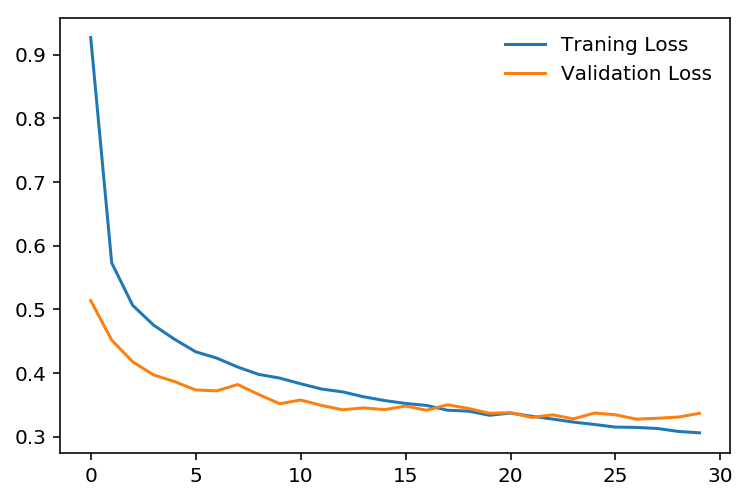

In [13]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.plot(train_losses,label='Traning Loss')
plt.plot(test_losses,label='Validation Loss')
plt.legend(frameon=False)